# Import Libraries and data set

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure charts are displayed without being called 
%matplotlib inline

In [3]:
# Create a path
path = r'/Users/ATeam/Desktop/CF/Achievement 6 - Applied analytics/Air Pollution'

In [4]:
# Import data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'air_pollution_2.csv'))

In [8]:
# Check column names
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Code,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths
0,0,0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,1,1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,2,2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,3,3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,4,4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


# Create a scatterplot to prep for regression analysis

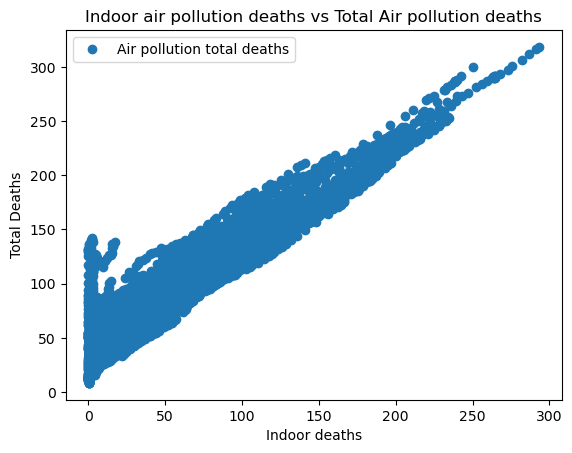

In [9]:
# Create a scatterplot for indoor deaths vs total air polution deaths 
df.plot(x = 'Indoor air pollution deaths', y='Air pollution total deaths',style='o') 
plt.title('Indoor air pollution deaths vs Total Air pollution deaths')  
plt.xlabel('Indoor deaths')  
plt.ylabel('Total Deaths')  
plt.show()

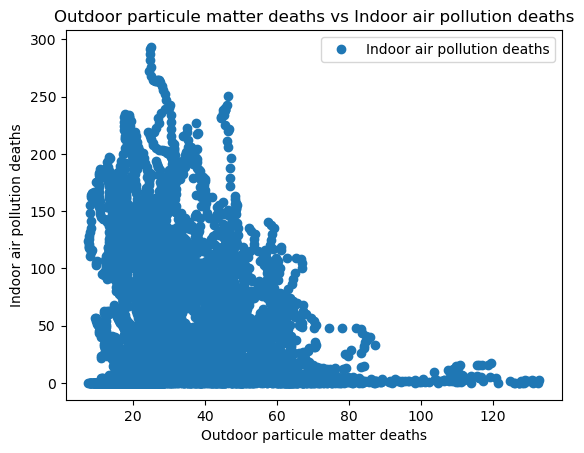

In [11]:
# Create a scatterplot for outdoor particule matter deaths vs indoor air pollution deaths
df.plot(x = 'Outdoor particule matter deaths', y='Indoor air pollution deaths',style='o') 
plt.title('Outdoor particule matter deaths vs Indoor air pollution deaths')  
plt.xlabel('Outdoor particule matter deaths')  
plt.ylabel('Indoor air pollution deaths')  
plt.show()

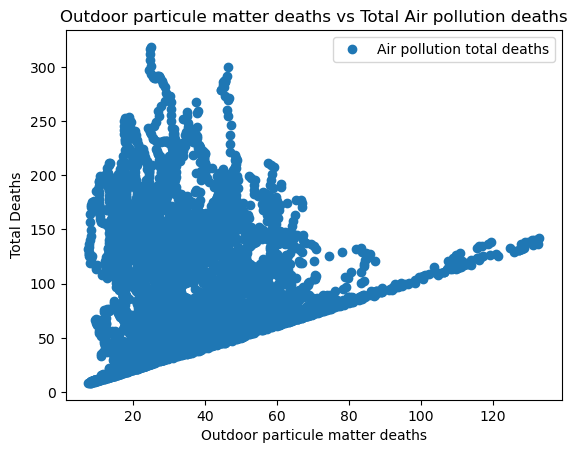

In [13]:
# Create a scatterplot for outdoor particule matter deaths vs total air polution deaths 
df.plot(x = 'Outdoor particule matter deaths', y='Air pollution total deaths',style='o') 
plt.title('Outdoor particule matter deaths vs Total Air pollution deaths')  
plt.xlabel('Outdoor particule matter deaths')  
plt.ylabel('Total Deaths')  
plt.show()

Hypothesis: The number of indoor pollution deaths will have the biggest impact on the number of total air pollution deaths.  

# Reshape the variables

In [15]:
# Reshape the variables

X = df['Indoor air pollution deaths'].values.reshape(-1,1)
y = df['Air pollution total deaths'].values.reshape(-1,1)

In [16]:
# Check the X variable
X

array([[250.36290974],
       [242.57512497],
       [232.04387789],
       ...,
       [104.34050567],
       [100.39228701],
       [ 96.23599602]])

In [17]:
# Check the y variable
y

array([[299.47730888],
       [291.27796673],
       [278.96305562],
       ...,
       [132.75255321],
       [128.69213768],
       [125.02884259]])

# Split the data into two sets

In [18]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Perform a regression analysis

In [19]:
# Create a regression object
regression = LinearRegression()  

In [20]:
# Fit the regression object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values for y on the test set 
y_predicted = regression.predict(X_test)

# Create a plot that shows the regression line on the test set

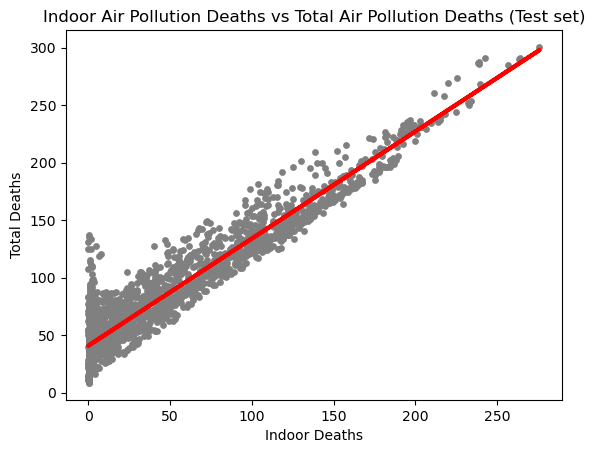

In [23]:
# Create the regression analysis
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Indoor Air Pollution Deaths vs Total Air Pollution Deaths (Test set)')
plot_test.xlabel('Indoor Deaths')
plot_test.ylabel('Total Deaths')
plot_test.show()

The number of indoor pollution deaths is a good way to predict how the total number of pollution deaths will fluctuate. 

# Check the model performance statistics—MSE and R2 score

In [24]:
# Create objects that contain the model performance statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [26]:
# Print the model performance statistics
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Mean squared error:  333.28834132391387
R2 score:  0.8970709638026237


# Compare the predicted y values with the actual y values

In [28]:
# Check predicted y values
y_predicted

array([[ 58.22337266],
       [ 41.19108818],
       [104.40627342],
       ...,
       [ 62.99576426],
       [ 41.02604127],
       [ 44.9030652 ]])

In [29]:
# Create a df comparing actual and predicted y values 
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,79.541444,58.223373
1,61.655582,41.191088
2,117.293263,104.406273
3,102.641595,74.405355
4,74.224038,71.255046
5,74.870937,64.008259
6,19.272909,41.002060
7,40.743780,53.047513
8,168.933699,166.298259
9,86.054051,62.501199


The MSE of 333 is is a very large value, telling me the model is not working well or the regression may not be the best way to represent the data. However, the R2 score of 90% tells me the model is a good fit. These measures are providing inconsistent feedback. 

The predictive values have a great deal of variance from the actual y values, which aligns with the MSE. A multiple regression may be needed to get a better sense of what truly impacts the total air pollution deaths. Also, other factors may have to be taken into consideration as to what is causing the deaths. 